<a href="https://colab.research.google.com/github/limminxian/DAC/blob/main/99co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install bs4 selenium

     |████████████████████████████████| 958 kB 7.7 MB/s 
     |████████████████████████████████| 356 kB 33.4 MB/s 
     |████████████████████████████████| 138 kB 35.3 MB/s 
     |████████████████████████████████| 3.6 MB 15.3 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 58 kB 4.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
pip install webdriver-manager

     |████████████████████████████████| 127 kB 13.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.8
    Uninstalling urllib3-1.26.8:
      Successfully uninstalled urllib3-1.26.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.0 requires urllib3[secure]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
pip install --upgrade requests

     |████████████████████████████████| 63 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backpor

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.utils import ChromeType
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=chrome_options)

In [ ]:
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
driver.get("https://www.99.co/singapore/sale/hdb")
page_source=[]
button = []
links=[]
count = 0
while True:
  soup = BeautifulSoup(driver.page_source, 'lxml')
  time.sleep(3)
  linkclass = soup.find_all('a', class_='_3Ajbv _30I97 _1vzK2')
  for l in linkclass:
    links.append(l['href'])
  nextbutton = "https://www.99.co" + soup.find('li', class_='next').find('a')['href']
  button.append(nextbutton)
  driver.get(nextbutton)
  time.sleep(5)
  break
  count+=1
  if count==4:
    break

for link in links:
      driver.get("https://www.99.co" + link)
      page_source.append(BeautifulSoup(driver.page_source,'lxml')) 

In [4]:
soup.find('li', class_='next').find('a')['href']

'/singapore/sale/hdb?page_num=2'

In [10]:
nextbutton

'https://www.99.co/singapore/sale/hdb?page_num=3'

In [23]:
import re
import pandas as pd

data = {'price':  [],
        'location': [],
        'bedrooms':[],
        'bathroom':[],
        'sqrf':[],
        'distance':[]
        }

df = pd.DataFrame(data)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

for page in page_source:
  dis = page.find('div',class_='UUAXj')
  if dis is not None:
    distance = int(dis.find('p',class_='_2sIc2 _2rhE- _1c-pJ').find('span').get_text().split(' ', 1)[0])
  else:
    distance = 0
  p = int(re.sub('[,]', '', page.find('h2',class_='_1zGm8 _3na6W _1vzK2').get_text()[1:]))
  l = page.find('p',class_='dniCg _3j72o _2rhE-').find('span').get_text()[1:]
  bbs = page.find_all('p',class_='_2sIc2 _29qfj _2rhE-')
  b = bbs[0].get_text()
  ba = bbs[1].get_text()
  s = int(re.sub('[,]', '',bbs[2].get_text()[:-5]))
  df=df.append( {'price':p, 'location':l, 'bedrooms':b, 'bathroom':ba, 'sqrf': s, 'distance':distance}, ignore_index=True)

In [20]:
df


,price,location,bedrooms,bathroom,sqrf,distance
0,620000.0,Ang Mo Kio / Bishan / Thomson (D20),3 Beds,2 Baths,1141.0,15
1,580000.0,Balestier / Toa Payoh (D12),2 Beds,2 Baths,721.0,20
2,520000.0,Pasir Ris / Tampines (D18),3 Beds,2 Baths,1130.0,25
3,799000.0,Boon Lay / Jurong / Tuas (D22),3 Beds,2 Baths,1302.0,20
4,868000.0,Ang Mo Kio / Bishan / Thomson (D20),3 Beds,2 Baths,1000.0,10
5,835000.0,Hougang / Punggol / Sengkang (D19),4 Beds,3 Baths,1636.0,10
6,508000.0,Bukit Batok / Bukit Panjang / Choa Chu Kang (D23),3 Beds,2 Baths,1119.0,15
7,620000.0,Pasir Ris / Tampines (D18),3 Beds,2 Baths,1377.0,Nil
8,580000.0,Hougang / Punggol / Sengkang (D19),3 Beds,2 Baths,1227.0,5
9,760000.0,Bukit Batok / Bukit Panjang / Choa Chu Kang (D23),4 Beds,2 Baths,1561.0,5


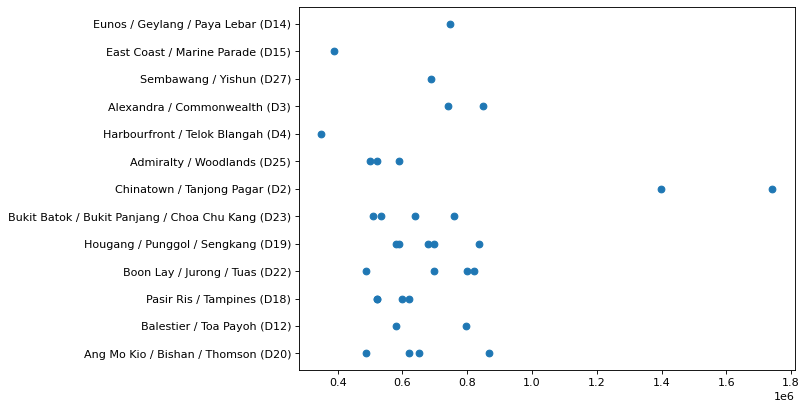

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.scatter(df['price'], df['location'])

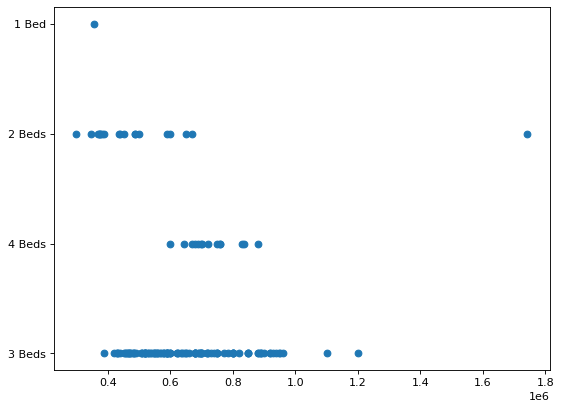

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['price'], df['bedrooms'])

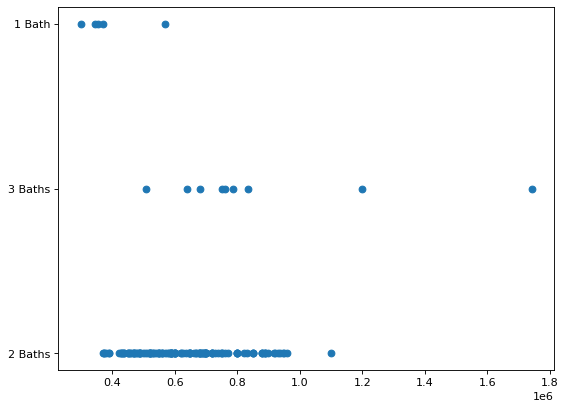

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['price'], df['bathroom'])

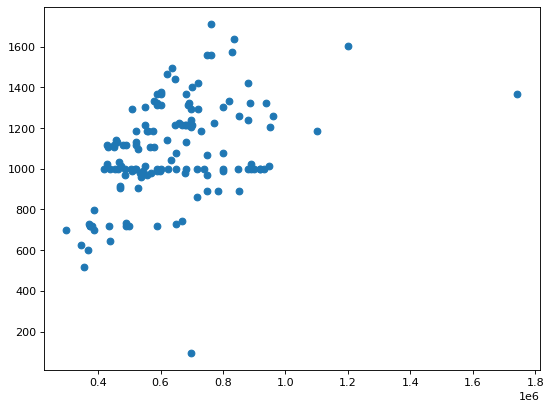

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['price'], df['sqrf'])

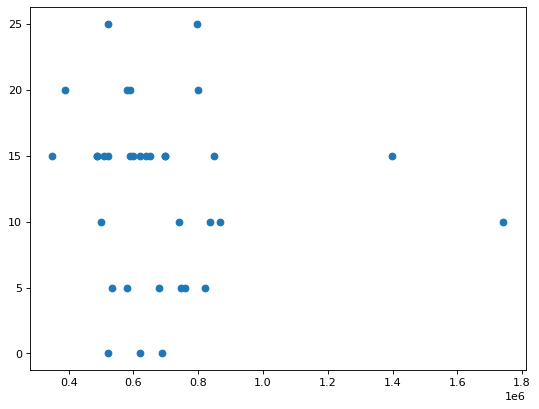

In [24]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['price'], df['distance'])